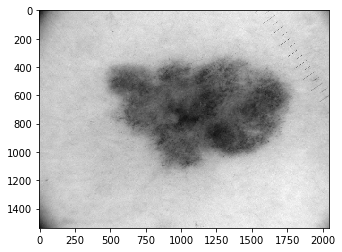

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/rumi/ISIC"

CATEGORIES = ["Color", "superpixel"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array)

[[ 30  34  36 ... 120 121 126]
 [ 34  37  39 ... 120 120 124]
 [ 36  38  40 ... 121 120 122]
 ...
 [ 33  33  34 ... 137 138 137]
 [ 34  33  33 ... 135 135 133]
 [ 35  32  32 ... 133 132 130]]


In [4]:
print(img_array.shape)


(419, 451)


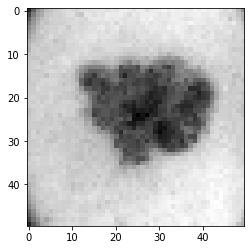

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


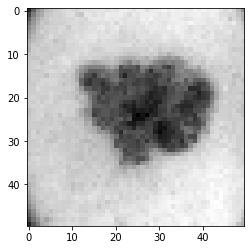

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 1728/1728 [02:05<00:00, 13.72it/s]

3456


In [7]:
import random

random.shuffle(training_data)


In [8]:
for sample in training_data[:100]:
    print(sample[1])

0
0
0
0
0
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
1
1
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
1
1
0
1
1
0
0
0
0
0
0
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
0
1
0
1
1
1
1
1
1
0
0
1
0


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 28]
   [ 29]
   [136]
   ...
   [159]
   [140]
   [122]]

  [[ 38]
   [ 27]
   [146]
   ...
   [153]
   [155]
   [150]]

  [[ 39]
   [145]
   [148]
   ...
   [154]
   [159]
   [148]]

  ...

  [[ 49]
   [150]
   [157]
   ...
   [160]
   [151]
   [149]]

  [[ 48]
   [150]
   [155]
   ...
   [156]
   [154]
   [145]]

  [[ 45]
   [ 60]
   [152]
   ...
   [151]
   [150]
   [134]]]]
